In [1]:
bank <- read.delim("bank.csv", sep = ";", header = TRUE)

In [2]:
library(dplyr)
library(ggplot2)
library(stringr)
library(assertive)
library(visdat)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'assertive' was built under R version 3.6.3"Warning message:
"package 'visdat' was built under R version 3.6.3"

In [3]:
head(bank)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [4]:
summary(bank)

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact          day       
 Min.   :-3313   no :1962   no :3830   cellular :2896   Min.   : 1.00  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   1st Qu.: 9.00  
 Median :  444                         unknown  :1324   Median :16.00  
 Mean   : 1423                                          Mean   :15.92  
 3rd Qu.

In [5]:
assert_all_are_not_na(bank)
sum(is.na(bank))

[1] 0

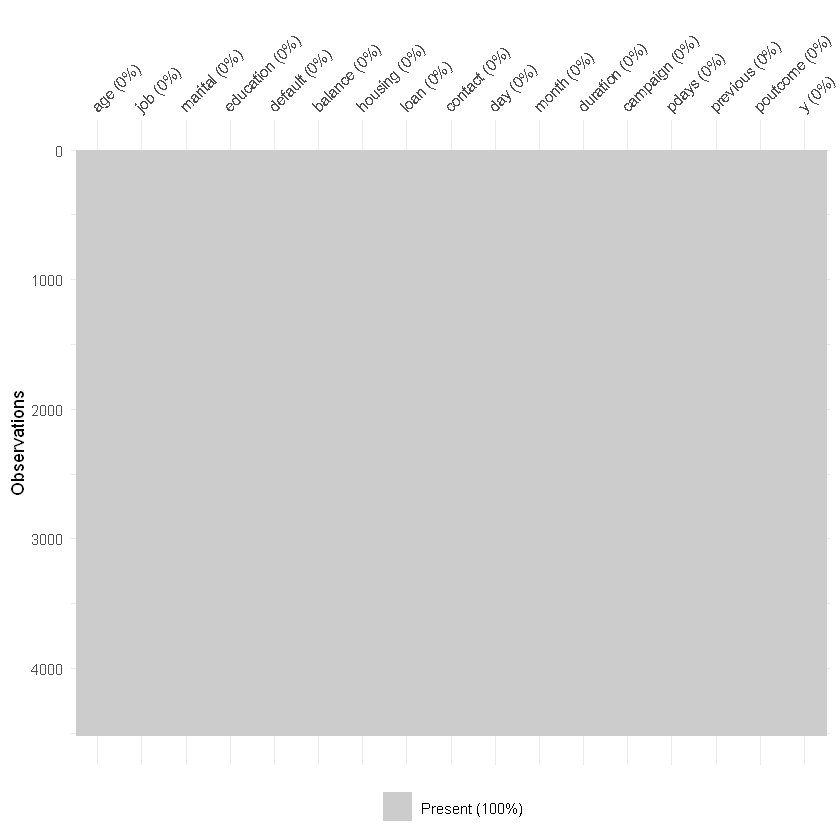

In [6]:
vis_miss(bank)

Since there is no missing values, there is no need to clean the data. 

EDA

In [7]:
levels(bank$y)
levels(bank$job)
levels(bank$marital)
levels(bank$education)
levels(bank$default)
levels(bank$housing)
levels(bank$loan)

[1] "no"  "yes"

[1] "admin."        "blue-collar"   "entrepreneur"  "housemaid"    
 [5] "management"    "retired"       "self-employed" "services"     
 [9] "student"       "technician"    "unemployed"    "unknown"

[1] "divorced" "married"  "single"

[1] "primary"   "secondary" "tertiary"  "unknown"

[1] "no"  "yes"

[1] "no"  "yes"

[1] "no"  "yes"

In [8]:
table(bank$y)
table(bank$job)
table(bank$marital)
table(bank$education)
table(bank$default)
table(bank$housing)
table(bank$loan)


  no  yes 
4000  521 


       admin.   blue-collar  entrepreneur     housemaid    management 
          478           946           168           112           969 
      retired self-employed      services       student    technician 
          230           183           417            84           768 
   unemployed       unknown 
          128            38 


divorced  married   single 
     528     2797     1196 


  primary secondary  tertiary   unknown 
      678      2306      1350       187 


  no  yes 
4445   76 


  no  yes 
1962 2559 


  no  yes 
3830  691 

In [9]:
bank %>% group_by(age, job, education) %>% 
summarise(mean_balance = mean(balance))

`summarise()` has grouped output by 'age', 'job'. You can override using the `.groups` argument.


age,job,education,mean_balance
19,student,primary,103.0000
19,student,secondary,302.0000
19,student,unknown,584.5000
20,student,secondary,661.3333
21,services,secondary,1132.0000
21,student,secondary,2504.7500
21,student,unknown,137.0000
22,admin.,secondary,4111.0000
22,student,primary,3472.0000
22,student,secondary,1367.0000


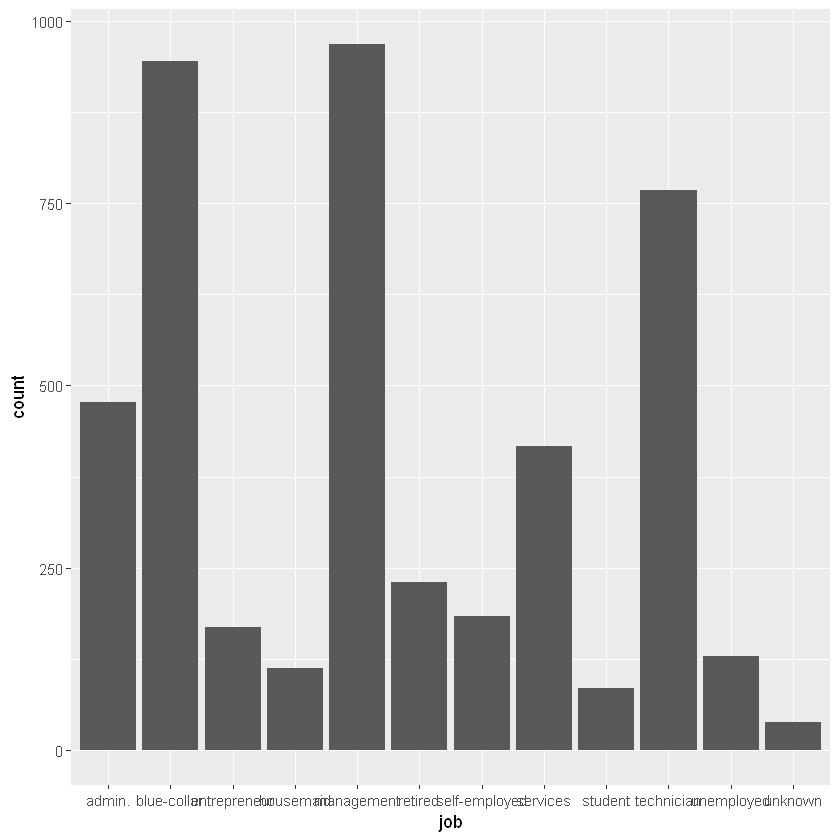

In [10]:
ggplot(bank, aes(x = job)) + geom_bar()

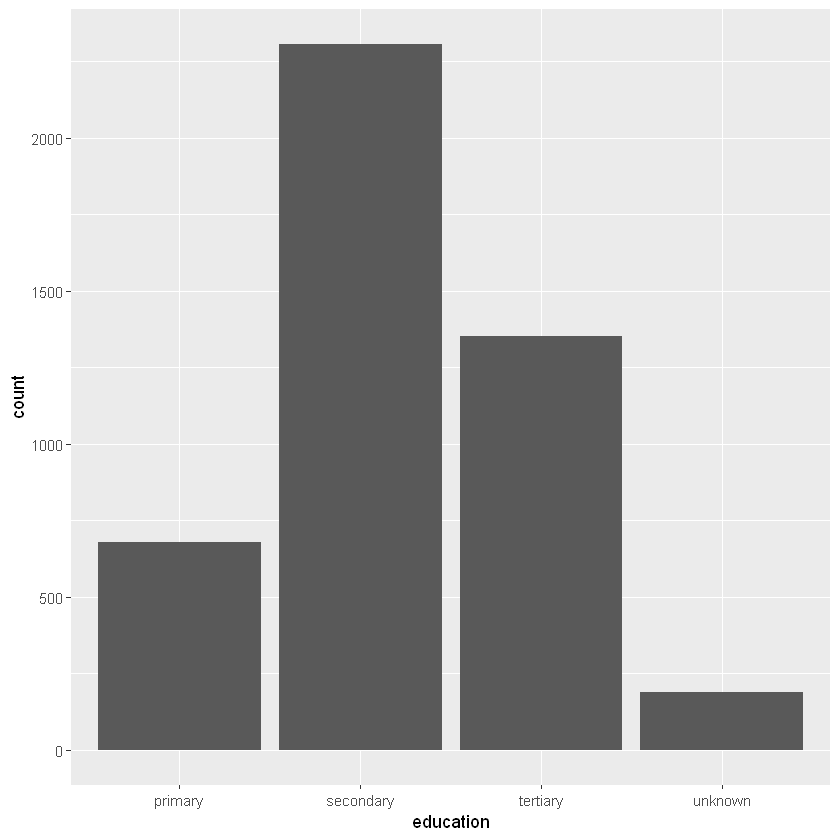

In [11]:
ggplot(bank, aes(x = education)) + geom_bar()

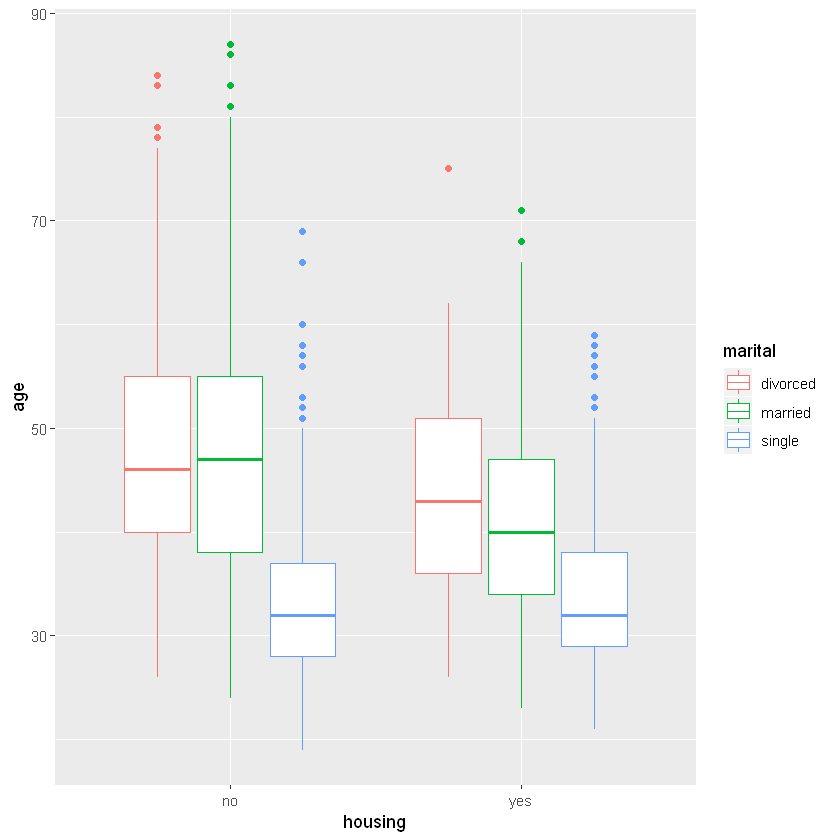

In [12]:
ggplot(bank, aes(x = housing, y = age, color = marital)) + geom_boxplot()    

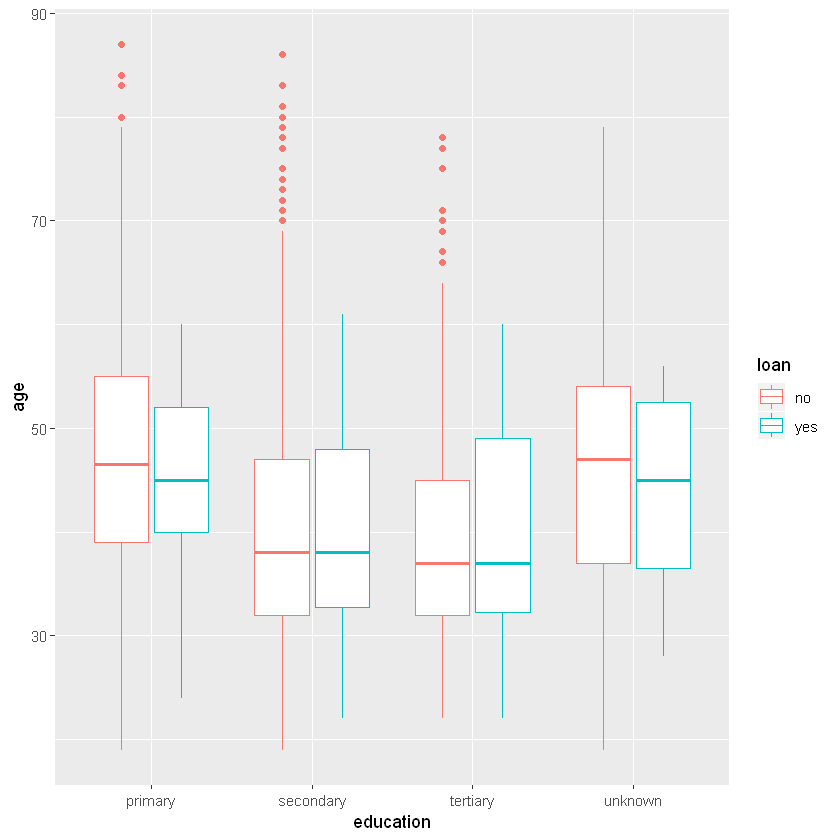

In [13]:
ggplot(bank, aes(x = education, y = age, color = loan)) + geom_boxplot()

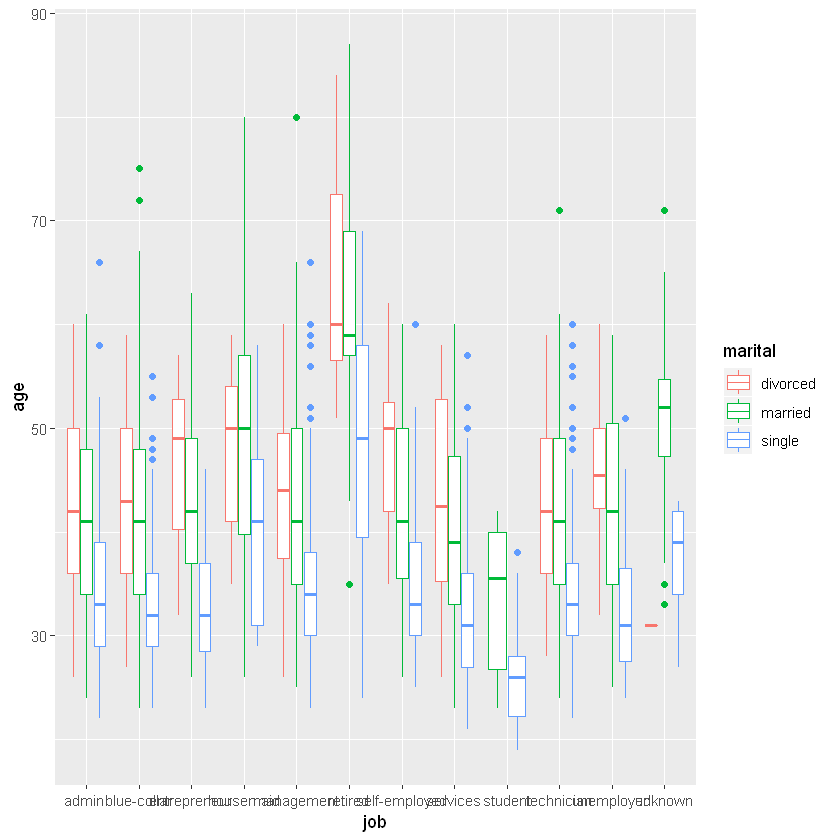

In [14]:
ggplot(bank, aes(x = job, y = age, color = marital)) + geom_boxplot()

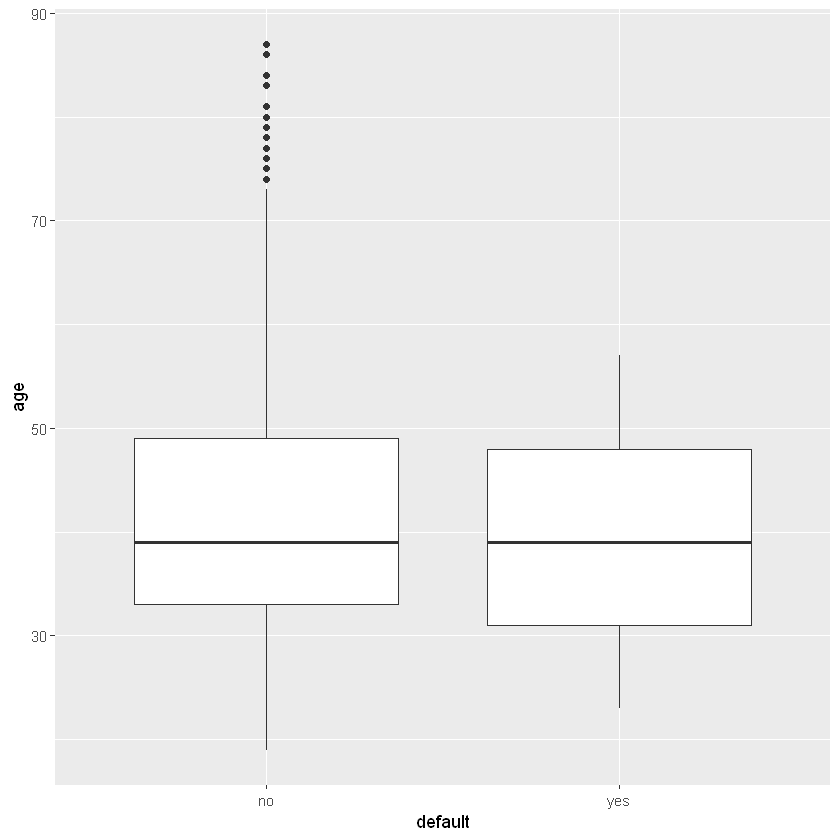

In [15]:
ggplot(bank, aes(x = default, y = age)) + geom_boxplot()

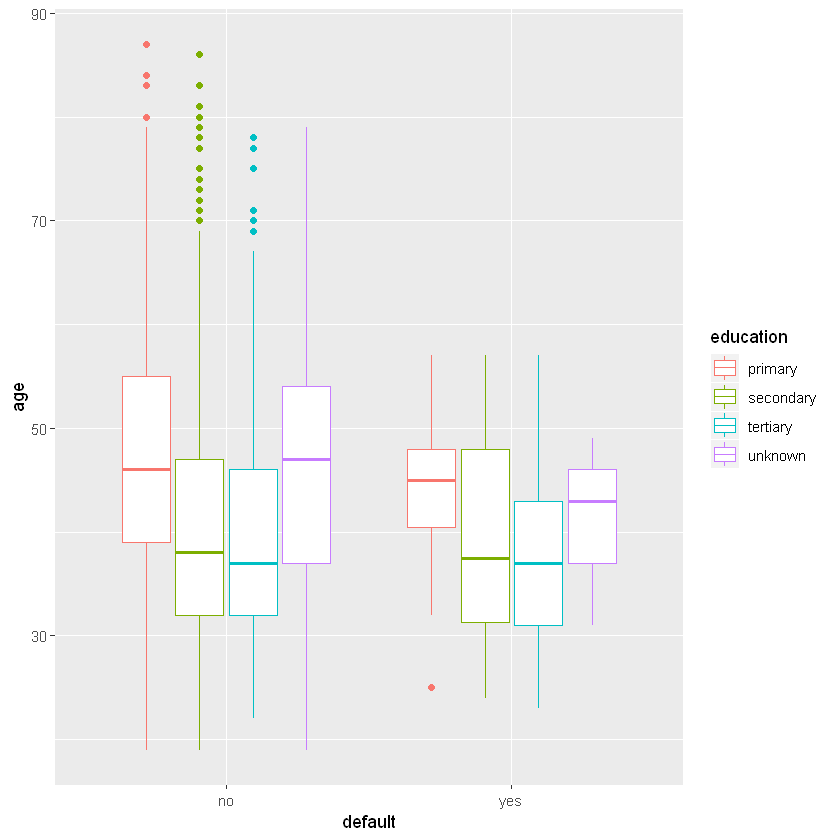

In [16]:
ggplot(bank, aes(x = default, y = age, color = education)) + geom_boxplot()

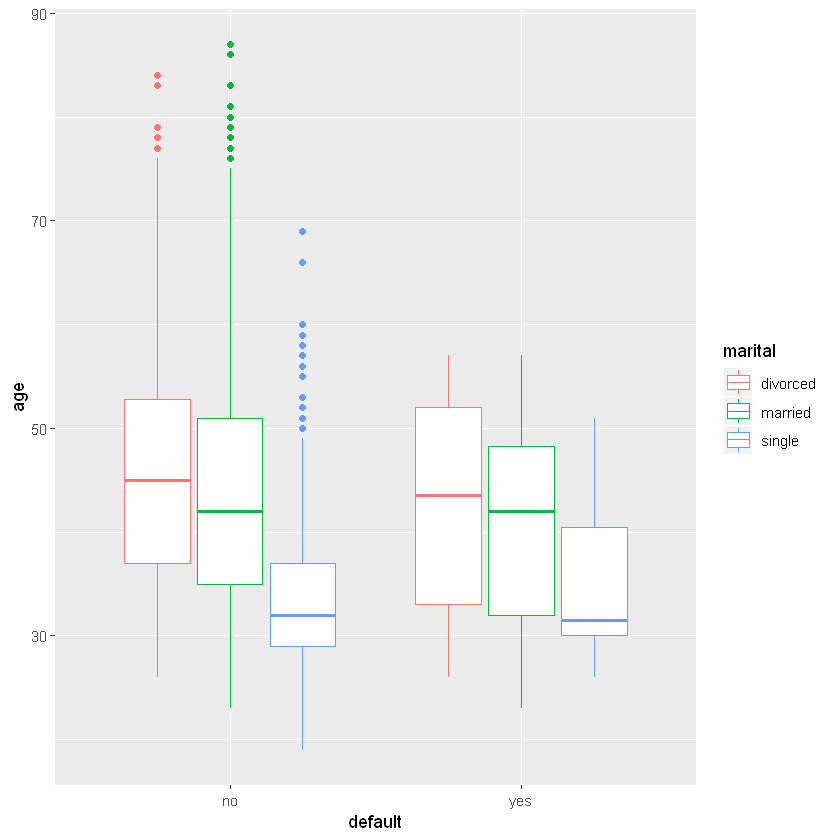

In [17]:
ggplot(bank, aes(x = default, y = age, color = marital)) + geom_boxplot()

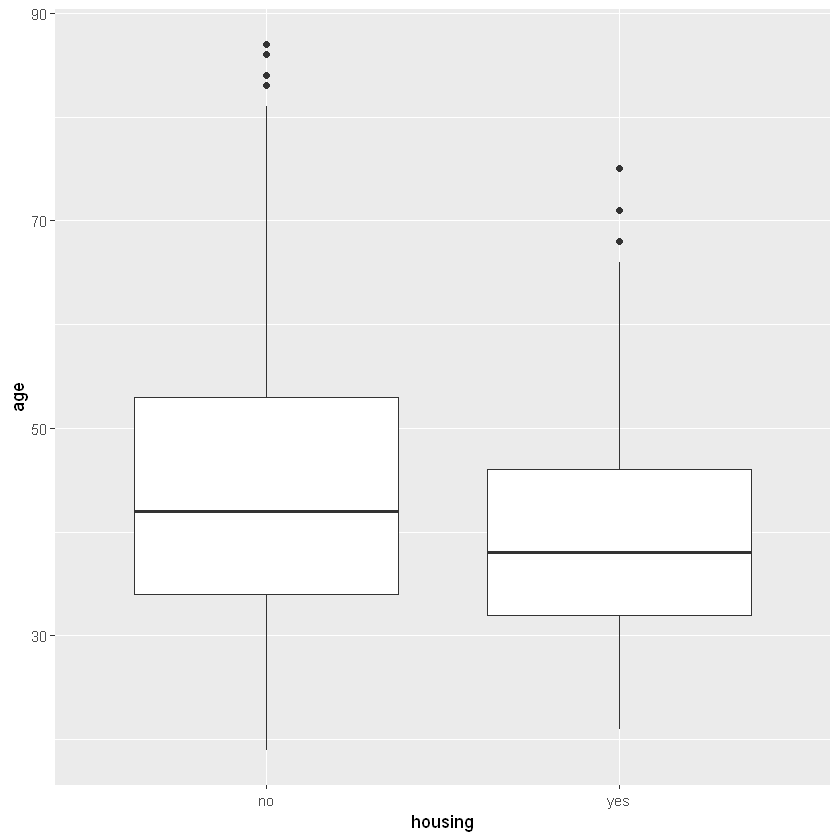

In [18]:
ggplot(bank, aes(x = housing, y = age)) + geom_boxplot()

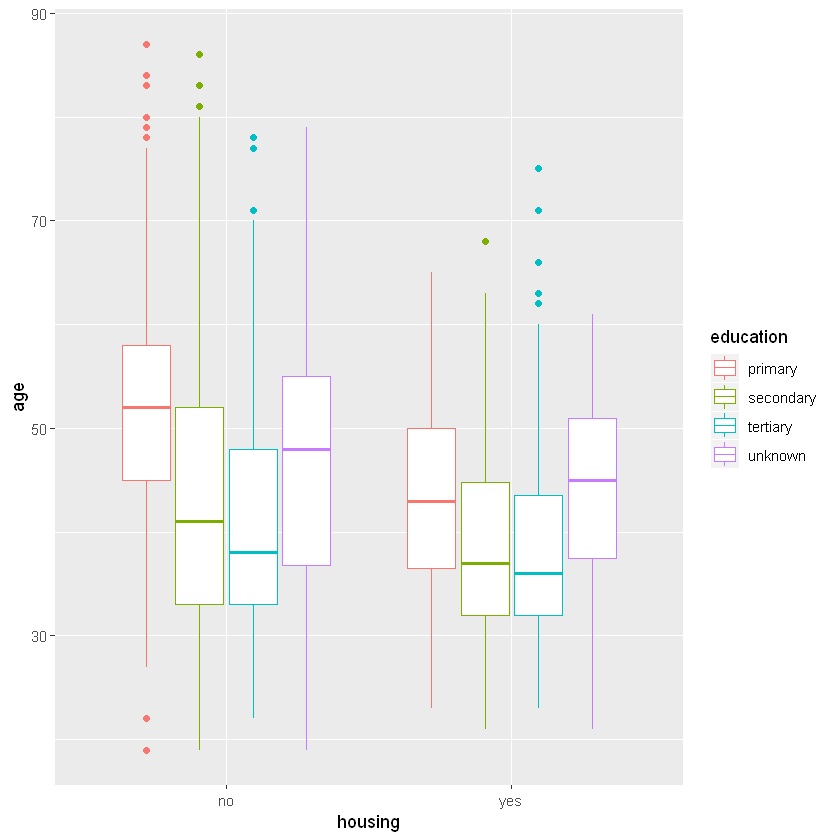

In [19]:
ggplot(bank, aes(x = housing, y = age, color = education)) + geom_boxplot()

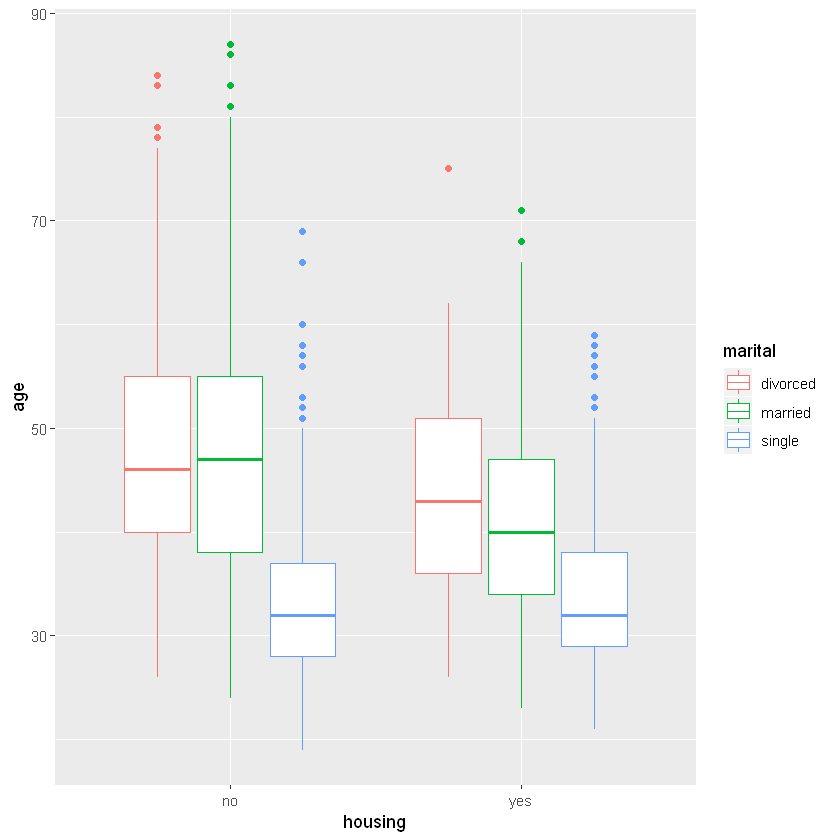

In [20]:
ggplot(bank, aes(x = housing, y = age, color = marital)) + geom_boxplot()

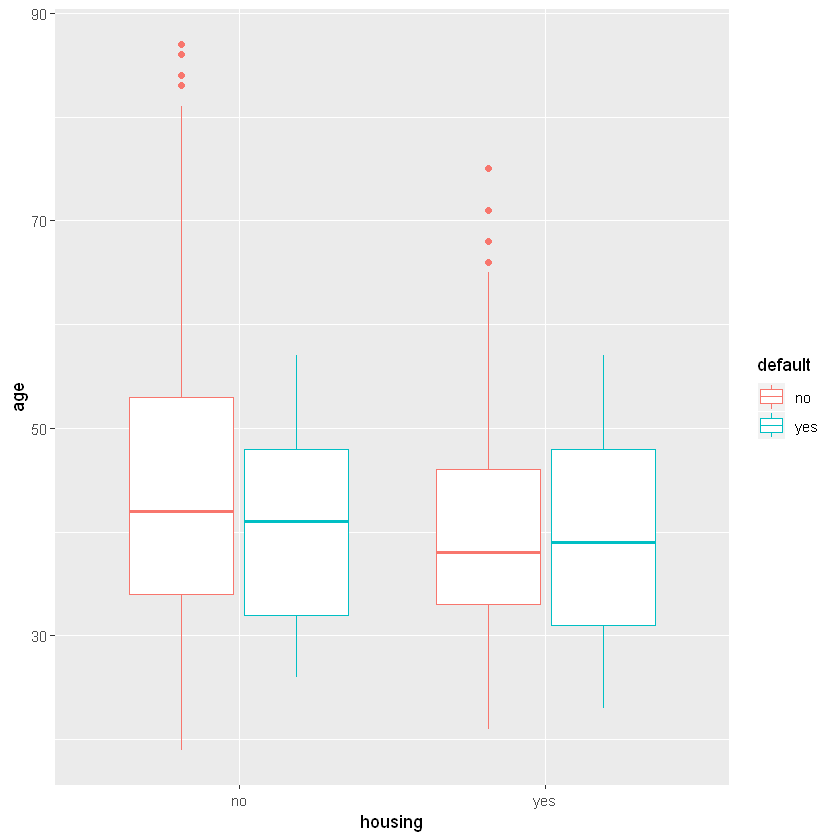

In [21]:
ggplot(bank, aes(x = housing, y = age, color = default)) + geom_boxplot()

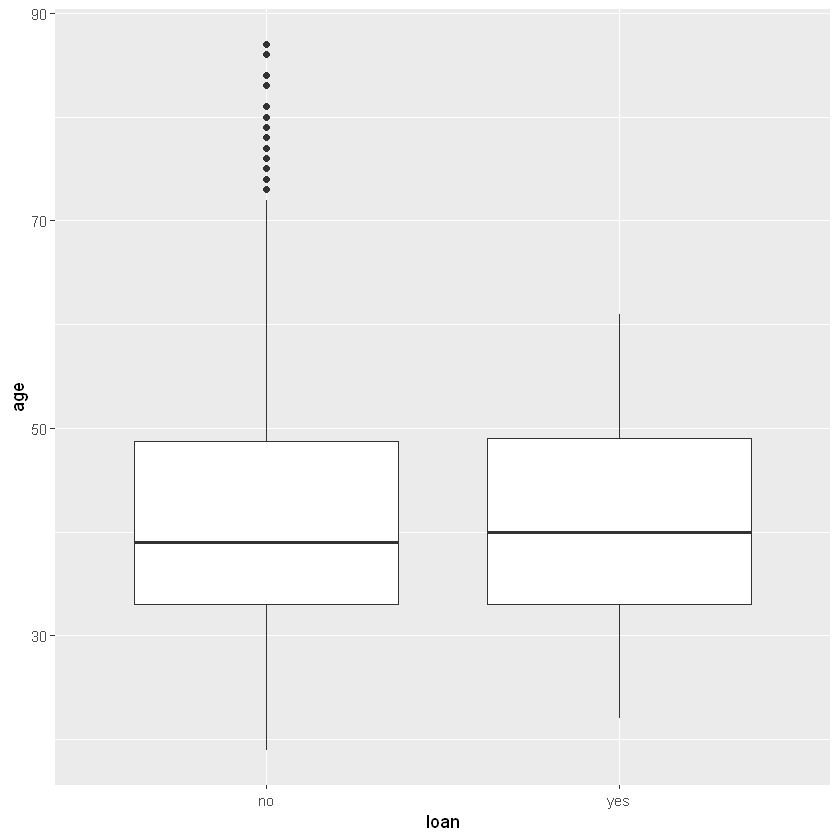

In [22]:
ggplot(bank, aes(x = loan, y = age)) + geom_boxplot()

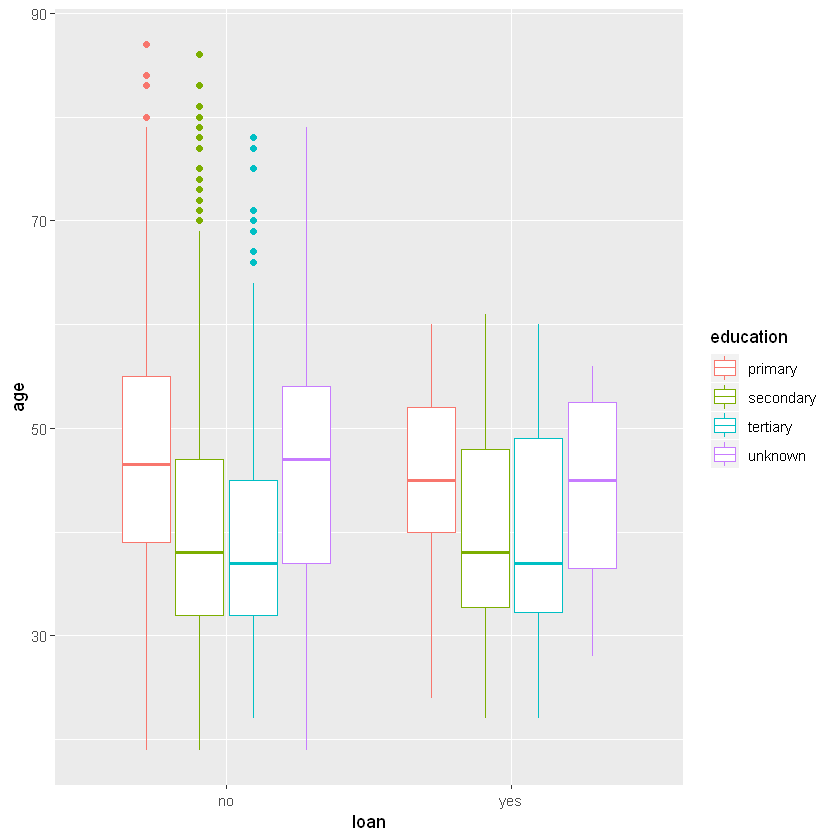

In [23]:
ggplot(bank, aes(x = loan, y = age, color = education)) + geom_boxplot()

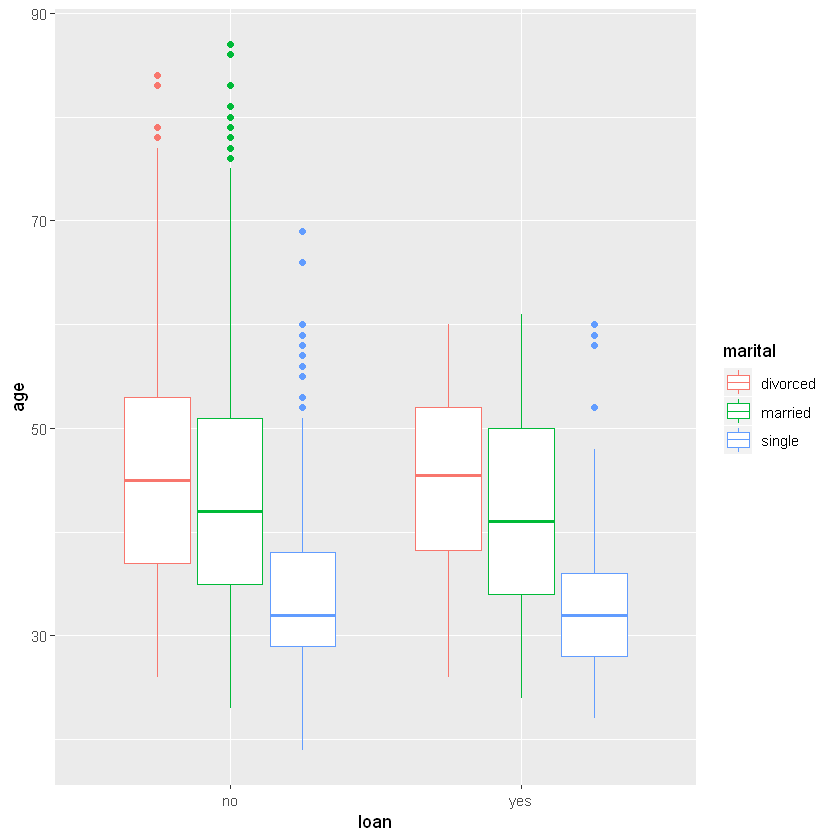

In [24]:
ggplot(bank, aes(x = loan, y = age, color = marital)) + geom_boxplot()

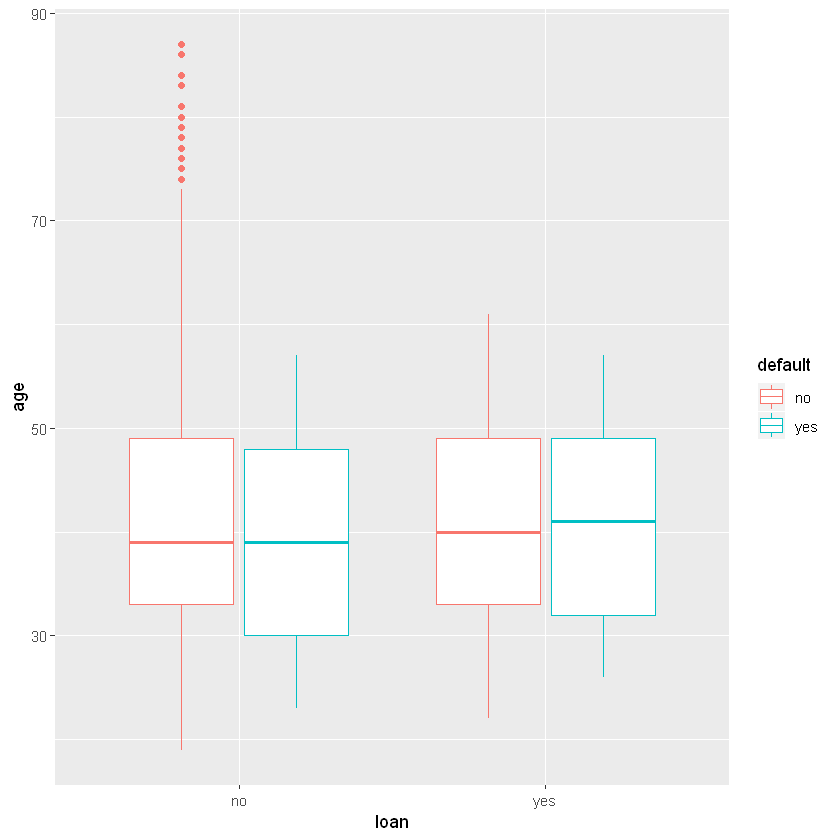

In [25]:
ggplot(bank, aes(x = loan, y = age, color = default)) + geom_boxplot()

In [26]:
install.packages('caTools')
library(caTools)

Installing package into 'C:/Users/msh52/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\msh52\OneDrive\Documents\R\win-library\3.6\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\msh52\OneDrive\Documents\R\win-library\3.6\caTools\libs\x64\caTools.dll: Permission denied"Warning message:
"restored 'caTools'"


The downloaded binary packages are in
	C:\Users\msh52\AppData\Local\Temp\RtmpOq4bvj\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [27]:
set.seed(101)
sample <- sample.split(bank$y, SplitRatio = 0.70)

In [28]:
train <- subset(bank, sample == TRUE)

Testing Data

In [29]:
test <- subset(bank, sample == FALSE)

Training the Model

In [30]:
model <- glm(as.factor(y) ~ ., family = binomial(logit), data = train)
summary(model)


Call:
glm(formula = as.factor(y) ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2138  -0.3758  -0.2477  -0.1444   3.1236  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.135e+00  7.476e-01  -4.194 2.74e-05 ***
age                 2.565e-04  8.696e-03   0.029 0.976471    
jobblue-collar     -3.146e-01  2.953e-01  -1.065 0.286713    
jobentrepreneur    -4.056e-01  4.784e-01  -0.848 0.396530    
jobhousemaid       -1.055e-01  4.847e-01  -0.218 0.827724    
jobmanagement      -6.561e-02  2.935e-01  -0.223 0.823147    
jobretired          6.555e-01  3.742e-01   1.752 0.079857 .  
jobself-employed   -2.784e-01  4.487e-01  -0.620 0.534961    
jobservices        -1.458e-01  3.261e-01  -0.447 0.654802    
jobstudent          3.349e-01  4.654e-01   0.720 0.471809    
jobtechnician      -3.012e-01  2.852e-01  -1.056 0.290907    
jobunemployed      -6.137e-01  5.218e-01  -1.176

In [31]:
test$predicted.y <- predict(model, newdata = test, type = "response")
table(test$y, test$predicted.y > 0.5)

     
      FALSE TRUE
  no   1174   26
  yes   111   45

Accuracy

In [32]:
(45+1174)/(1174+26+111+45)

[1] 0.8989676

Therefore, this logistic regression model is 90% accurate.

In [33]:
(45)/(45+111)

[1] 0.2884615

Therefore, this model is 29% precise.

Recall

In [34]:
(45)/(45+26)

[1] 0.6338028

Therefore, this model is 63% recall. 